In [2]:
import pandas as pd

In [3]:
# merge all csv files into one DataFrame
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
movies_df = pd.merge(pd.merge(movies, ratings), links)

movies_df.head()

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,114709,862.0


In [4]:
# 1. Unique users
movies_df['userId'].nunique()

610

In [5]:
# 2. Unique titles
movies_df['title'].nunique()

9719

In [6]:
# 3. Average rating
movies_df['rating'].mean()

3.501556983616962

In [7]:
# 4. Number of ratings per user
movies_df['userId'].value_counts()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
53       20
207      20
431      20
442      20
189      20
Name: count, Length: 610, dtype: int64

In [8]:
# 5. Number of ratings per movie
movies_df['title'].value_counts()

title
Forrest Gump (1994)                      329
Shawshank Redemption, The (1994)         317
Pulp Fiction (1994)                      307
Silence of the Lambs, The (1991)         279
Matrix, The (1999)                       278
                                        ... 
We're Back! A Dinosaur's Story (1993)      1
American Hardcore (2006)                   1
Shanghai Surprise (1986)                   1
Let's Get Harry (1986)                     1
Andrew Dice Clay: Dice Rules (1991)        1
Name: count, Length: 9719, dtype: int64

In [9]:
# 6. Have a look at the full distribution of ratings
movies_df['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

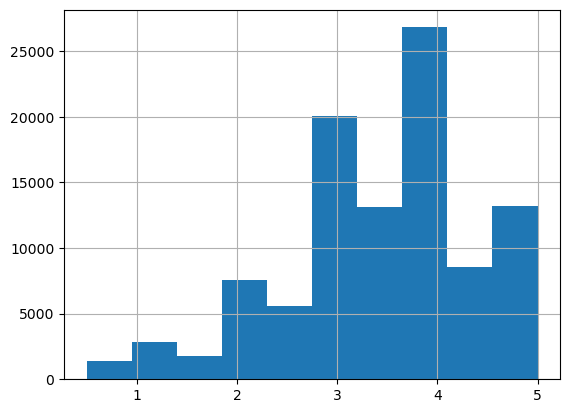

In [10]:
# 7. Create histograms of the distribution of ratings
import matplotlib.pyplot as plt
movies_df['rating'].hist()
plt.show()

In [11]:
# Highest rated movies - Let's look at the movies that have the highest average rating
rating_count_df = movies_df.groupby('title')['rating'].agg(['mean', 'count']).reset_index()
rating_count_df.nlargest(5, ['mean', 'count'])

,title,mean,count
954,Belle époque (1992),5.0,2
1902,Come and See (Idi i smotri) (1985),5.0,2
2758,Enter the Void (2009),5.0,2
3861,Heidi Fleiss: Hollywood Madam (1995),5.0,2
4612,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,5.0,2


In [12]:
# Find a hybrid system to sort movies, so that you can recommend the "best" movies that are both high rated and popular. Use this formular: Weighted Rating (WR) = (v/(v+m)R)+(m/(v+m)C) where, v is the number of votes for the movie m is the minimum votes required to be listed in the chart R is the average rating of the movie C is the mean vote across the whole dataset
rating_count_df['mean'].mean()
v = rating_count_df['count']
R = rating_count_df['mean']
C = rating_count_df['mean'].mean()
m = rating_count_df['count'].quantile(0.9)
rating_count_df['weighted_rating'] = (v/(v+m) * R) + (m/(v+m) * C)
rating_count_df.nlargest(10, 'weighted_rating')

,title,mean,count,weighted_rating
7593,"Shawshank Redemption, The (1994)",4.429022,317,4.337455
3499,"Godfather, The (1972)",4.289062,192,4.162486
3011,Fight Club (1999),4.272936,218,4.161569
8001,Star Wars: Episode IV - A New Hope (1977),4.231076,251,4.136995
9119,"Usual Suspects, The (1995)",4.237745,204,4.123742
6865,Pulp Fiction (1994),4.197068,307,4.121510
7421,Schindler's List (1993),4.225000,220,4.119775
5512,"Matrix, The (1999)",4.192446,278,4.110113
8002,Star Wars: Episode V - The Empire Strikes Back...,4.215640,211,4.107498
3158,Forrest Gump (1994),4.164134,329,4.095743
